In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


In [3]:
## Extract the data from the dataset
fldr = "/Users/91752/Downloads/UTKFace"

In [4]:
import os
flies = os.listdir(fldr)

Create list of images from dataset

In [5]:
ages = []
genders = []
images = []

for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

/Users/91752/Downloads/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
/Users/91752/Downloads/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
/Users/91752/Downloa

In [6]:
for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

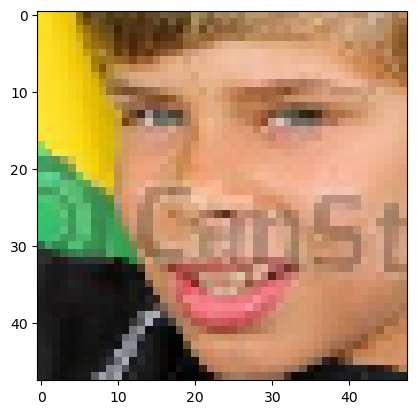

In [7]:
plt.imshow(images[45])

In [8]:
print(ages[45])

10


In [9]:
print(genders[45])

0


In [10]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

Saving the images array, ages array, genders array in the system

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'gen.nderspy',genders_f)


In [12]:
##Finding the number of males and females samples respectively in the dataset
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


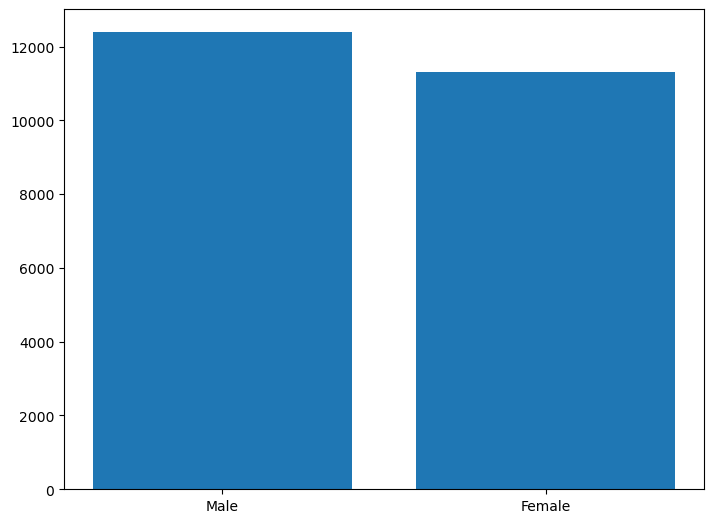

In [13]:
##Plotting the no. of male and female samples
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()


In [14]:
##finding the no. of samples in each age
values, counts = np.unique(ages_f, return_counts=True)
print(counts)
print(values)


[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [15]:
##converting age counts to lists
val = values.tolist()
cnt = counts.tolist()

Plotting the samples agewise

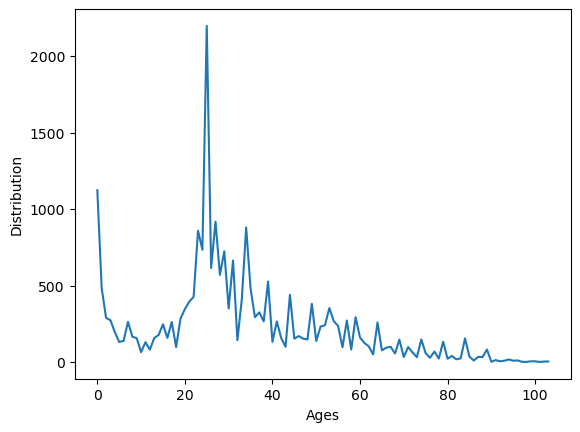

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

Defining the labels for output

In [17]:
labels = []
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

Creating another list of images from existing one

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f = np.array(labels)

Splitting the dataset into test and train

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [23]:
Y_train[0:5]

array([[45,  1],
       [26,  1],
       [20,  0],
       [ 7,  0],
       [62,  0]])

In [24]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]


In [25]:
Y_train_2[0][0:5]

array([1, 1, 0, 0, 0])

In [26]:
Y_train_2[1][0:5]

array([45, 26, 20,  7, 62])

In [27]:
##Defining the model
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x
    

In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy", "accuracy"])
    return model


In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - age_out_accuracy: 0.0409 - loss: 19.7579 - sex_out_accuracy: 0.5597
Epoch 1: val_loss improved from inf to 18.27149, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 125s 407ms/step - age_out_accuracy: 0.0409 - loss: 19.7493 - sex_out_accuracy: 0.5597 - val_age_out_accuracy: 0.0499 - val_loss: 18.2715 - val_sex_out_accuracy: 0.6487
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - age_out_accuracy: 0.0474 - loss: 15.2033 - sex_out_accuracy: 0.6457
Epoch 2: val_loss improved from 18.27149 to 13.58651, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 94s 339ms/step - age_out_accuracy: 0.0474 - loss: 15.2018 - sex_out_accuracy: 0.6458 - val_age_out_accuracy: 0.0499 - val_loss: 13.5865 - val_sex_out_accuracy: 0.6943
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - age_out_accuracy: 0.0456 - loss: 12.9756 - sex_out_accuracy: 0.7088
Epoch 3: val_loss improved from 13.58651 to 12.90

Model Evaluation

In [34]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - age_out_accuracy: 0.0499 - loss: 7.5287 - sex_out_accuracy: 0.8841


[7.501209259033203, 0.04994094744324684, 0.8824025392532349]

Model Prediction

In [35]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step


In [36]:
pred[1]

array([[28.387905],
       [22.449898],
       [22.868412],
       ...,
       [48.62464 ],
       [34.49067 ],
       [36.16941 ]], dtype=float32)

Plotting Loss

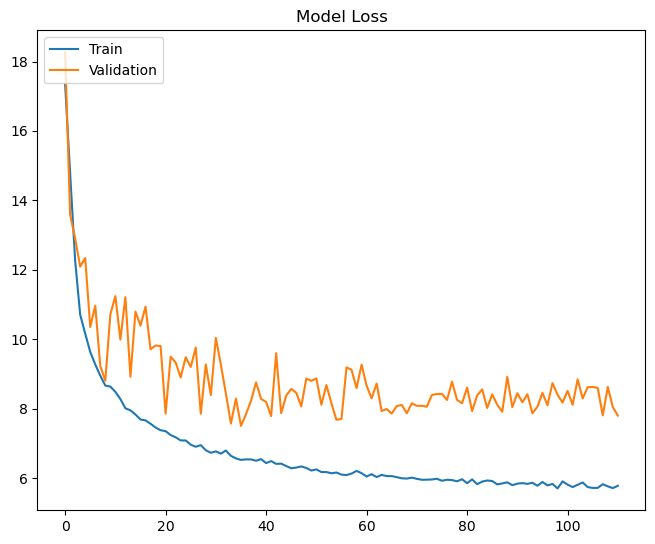

In [40]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)



Potting Sex Accuracy

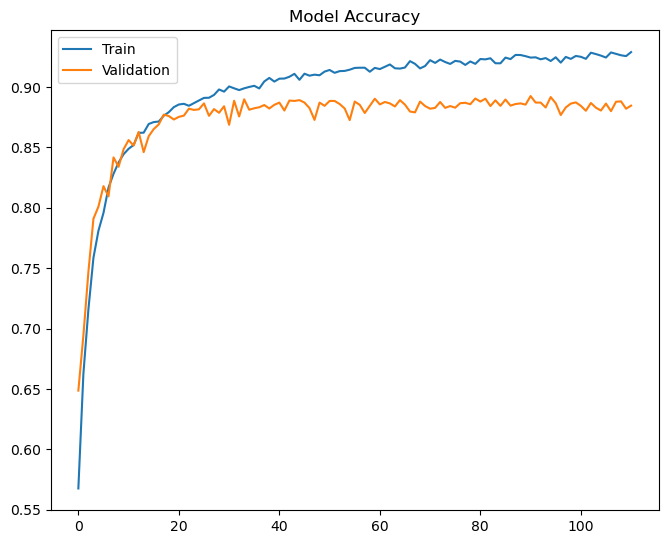

In [41]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Potting Gender Accuracy

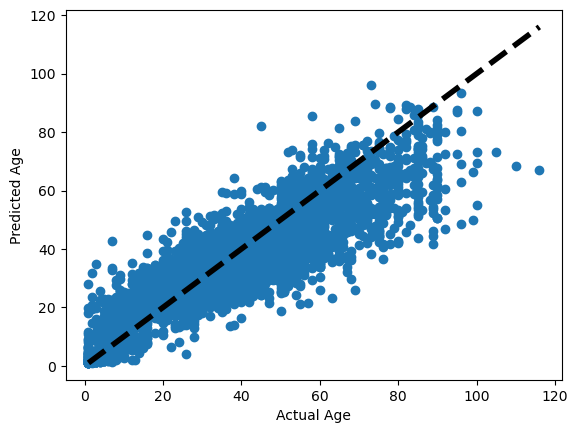

In [43]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()



In [44]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\91752\AppData\Local\Temp\ipykernel_14152\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
report = classification_report(Y_test_2[0],Pred_l)

In [47]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3115
           1       0.89      0.86      0.87      2812

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [49]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

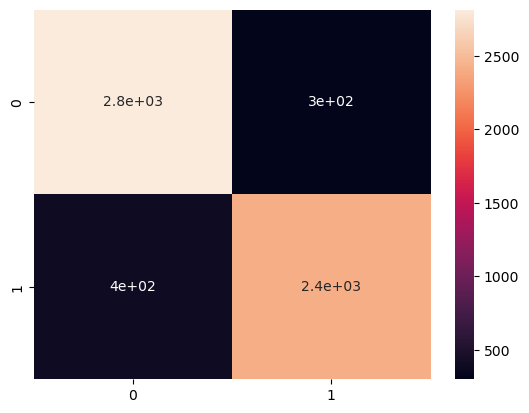

In [50]:
import seaborn as sns 
sns.heatmap(results,annot=True)

In [53]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted Age is"+ str(age))
    print("Predicted Gender is"+ sex_f[sex])
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Age is87
Predicted Gender isFemale


C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


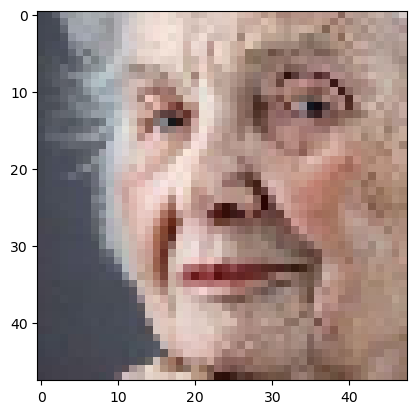

In [54]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Age is13
Predicted Gender isMale


C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


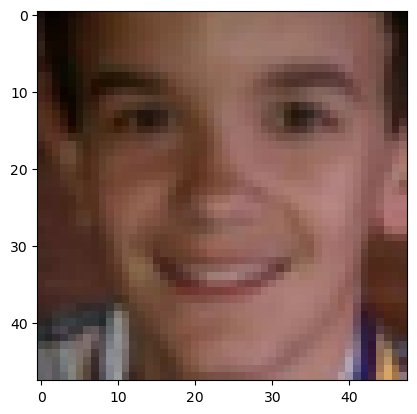

In [55]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Age is18
Predicted Gender isFemale


C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


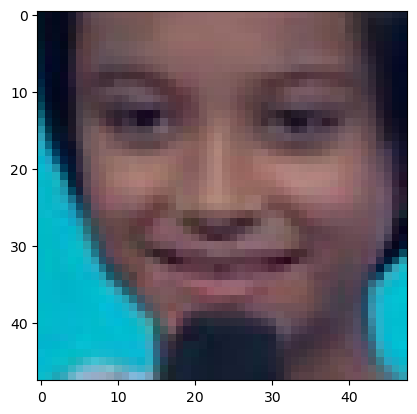

In [56]:
test_image(168,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Age is33
Predicted Gender isMale


C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


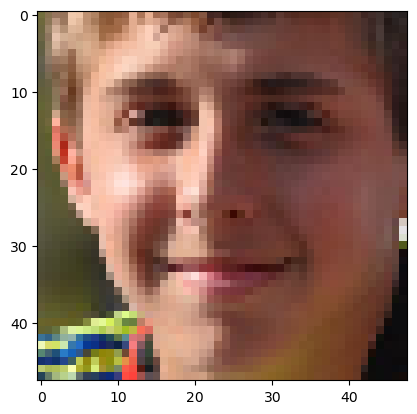

In [57]:
test_image(888,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Age is24
Predicted Gender isFemale


C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\91752\AppData\Local\Temp\ipykernel_14152\2714098460.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


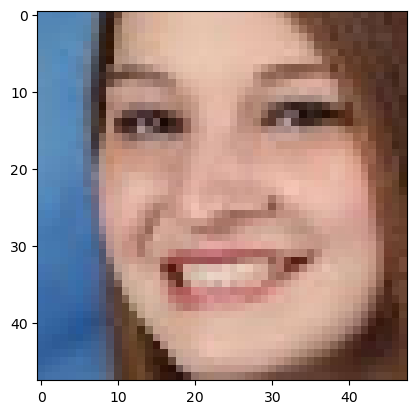

In [58]:
test_image(1288,images_f,images_f_2,Model)